In [53]:
### libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# other libraries
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud, STOPWORDS
import codecs


### read and explore data

In [2]:
## read data without live videos
df = pd.read_csv("hessas_nolive.csv")
df.head()

,created_time,message,id,from,Translate,is_human,sentment,positive,neutral,negative
0,2021-09-06T04:18:01+0000,Mohammed Adel,271594718130347_271821218107697,NaN,Mohammed Adel,T,neutral,0.00,1.00,0.00
1,2021-09-05T19:13:35+0000,مش بيجي منها حاجة ارحمونا بقى,271594718130347_271610824795403,NaN,Nothing comes of it. Have mercy on us,F,negative,0.21,0.24,0.55
2,2021-09-06T05:06:15+0000,الفيزياء,271594718130347_271840278105791,NaN,Physics,F,neutral,0.13,0.83,0.04
3,2021-09-06T00:02:03+0000,نرجو الرافة بالطلاب في الدور الثاني ومراعاتهم ...,271594718130347_271721658117653,NaN,نرجو الرافة بالطلاب في الدور الثاني ومراعاتهم ...,T,neutral,0.00,1.00,0.00
4,2021-09-05T19:06:33+0000,نهايه رحله,271594718130347_271608141462338,NaN,the end of the trip,F,neutral,0.10,0.86,0.04


### explore the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14870 entries, 0 to 14869
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   created_time  14870 non-null  object 
 1   message       14870 non-null  object 
 2   id            14870 non-null  object 
 3   from          43 non-null     object 
 4   Translate     14867 non-null  object 
 5   is_human      14870 non-null  object 
 6   sentment      14870 non-null  object 
 7   positive      14870 non-null  float64
 8   neutral       14870 non-null  float64
 9   negative      14870 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [4]:
df.describe()

,positive,neutral,negative
count,14870.000000,14870.000000,14870.000000
mean,0.124010,0.757987,0.118003
std,0.249091,0.343985,0.261390
min,0.000000,0.000000,0.000000
25%,0.000000,0.680000,0.000000
50%,0.010000,0.930000,0.010000
75%,0.120000,1.000000,0.060000
max,1.000000,1.000000,1.000000


### fix the data 

In [5]:
# drop embity columne
df.drop("from", axis = 1, inplace = True)

In [6]:
## fix time dtypes
df.created_time =  df["created_time"].str.slice(0, 10)
df["date"] = df["created_time"].str.slice(0, 7)
df.created_time

0        2021-09-06
1        2021-09-05
2        2021-09-06
3        2021-09-06
4        2021-09-05
            ...    
14865    2020-12-11
14866    2020-12-15
14867    2020-12-06
14868    2021-01-10
14869    2021-08-01
Name: created_time, Length: 14870, dtype: object

### filter data with human mentions and over rating

In [7]:
## drop human data
hdf = df.query('is_human != "T"')

## chose data without over rating
nudf = hdf.query('neutral < 0.7')

no need for this plot bit it's here

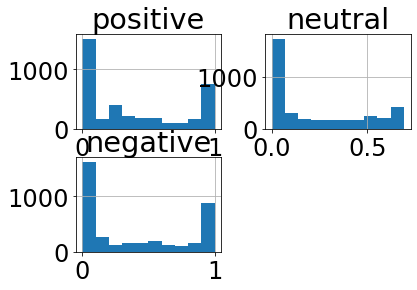

In [109]:
_ = nudf.hist()

### draw the total interactionscolors = sns.color_palette()

In [18]:
colors = sns.color_palette()

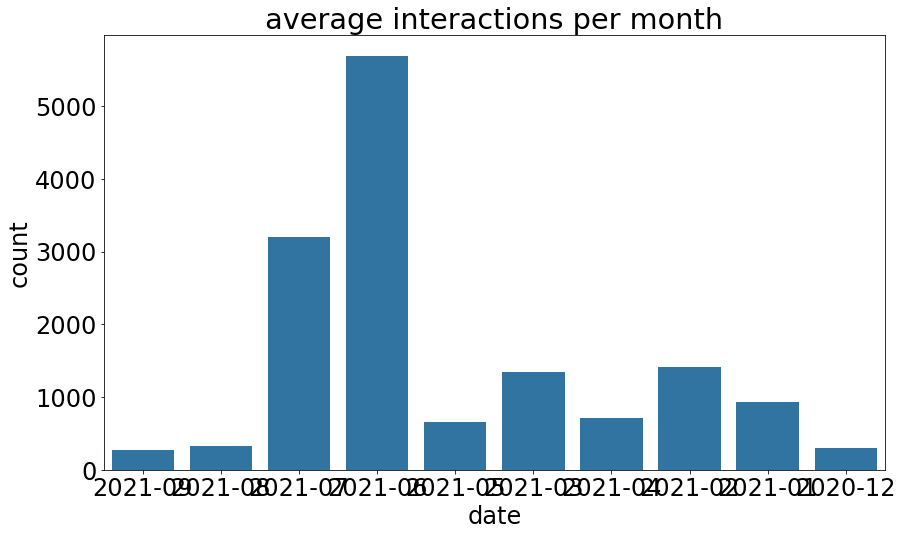

In [108]:
plot = plt.subplots(figsize = (14,8))
plot = sns.countplot(data = df,x = "date", color = colors[0])
_ = plt.ylabel("interactions count")
_ = plt.ylabel("count")
_ = plt.title(" average interactions per month ")

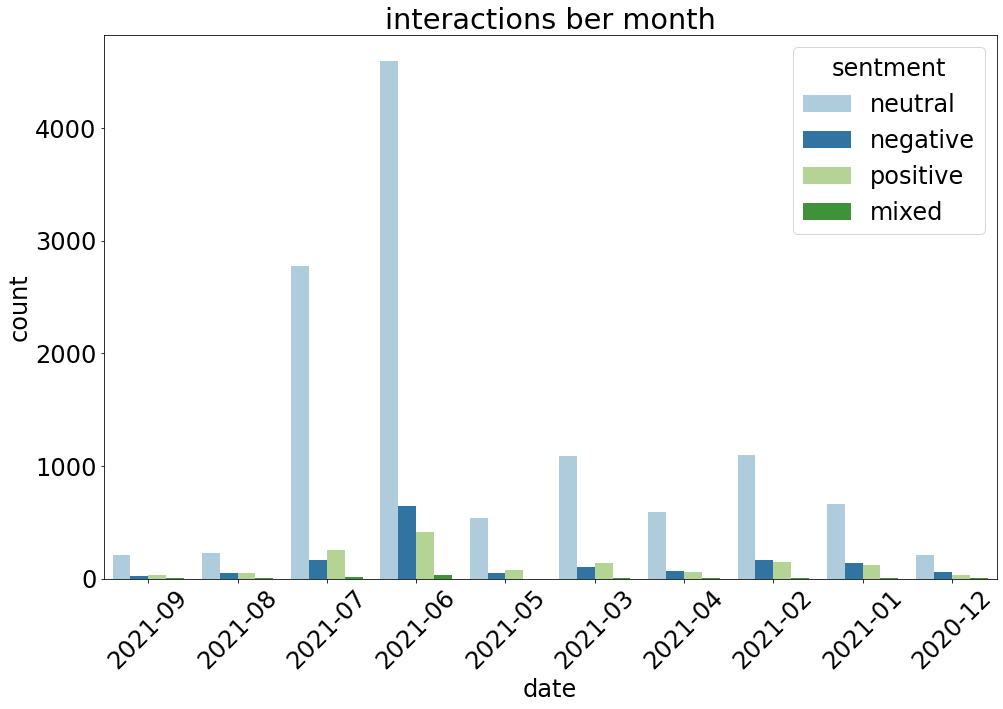

In [107]:
plot = plt.subplots(figsize = (16,10))
plot = sns.countplot(data = df, x ="date",hue = "sentment", palette = 'Paired')
_ = plt.xticks(rotation=45)
plt.title('interactions ber month')
plt.rcParams.update({'font.size':24})
_ = plt.ylabel("count")

In [ ]:
plot = plt.subplots(figsize = (16,10))
plot = sns.countplot(data = hdf, x ="date",hue = "sentment", palette = 'Paired')
_ = plt.xticks(rotation=45)
plt.title('interactions ber month without mentions')
plt.rcParams.update({'font.size':24})
_ = plt.ylabel("count")

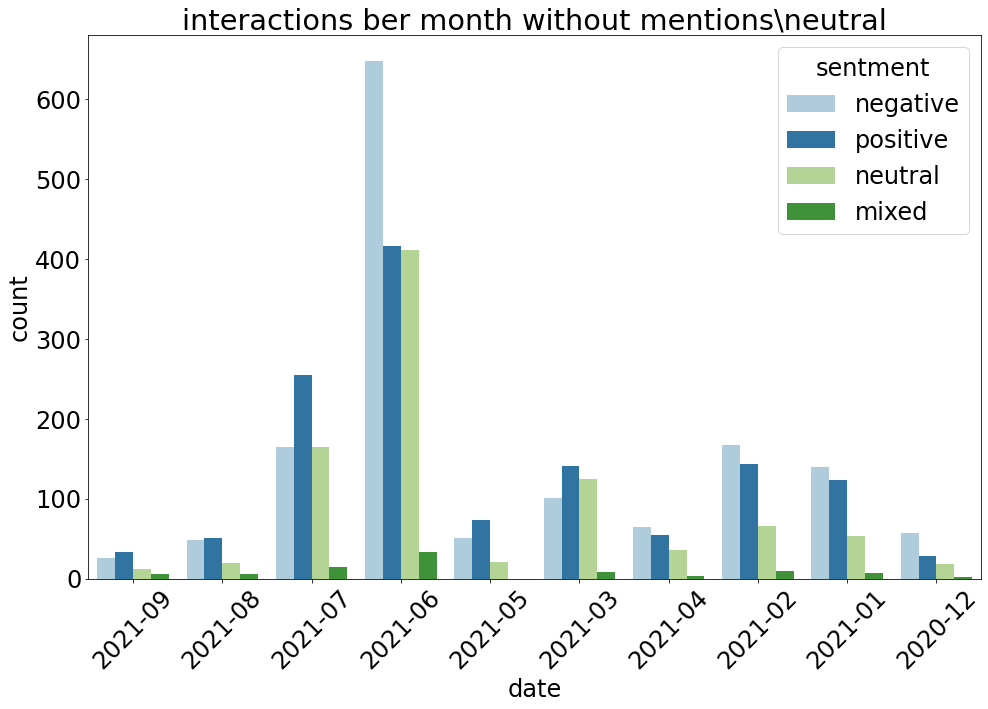

In [13]:
plot = plt.subplots(figsize = (16,10))
plot = sns.countplot(data = nudf, x ="date",hue = "sentment", palette = 'Paired')
_ = plt.xticks(rotation=45)
plt.title('interactions ber month without mentions\\neutral')
plt.rcParams.update({'font.size':24})
_ = plt.ylabel("count")

In [14]:
me = hdf[["neutral", "positive", "negative"]].groupby(hdf["date"]).mean()
me

,neutral,positive,negative
date,,,
2020-12,0.602561,0.148415,0.249024
2021-01,0.535202,0.225810,0.238988
2021-02,0.635000,0.174798,0.190202
2021-03,0.657314,0.205268,0.137419
2021-04,0.637446,0.172124,0.190430
2021-05,0.612917,0.230130,0.156953
2021-06,0.599204,0.183847,0.216949
2021-07,0.644016,0.222783,0.133202
2021-08,0.533508,0.241371,0.225121


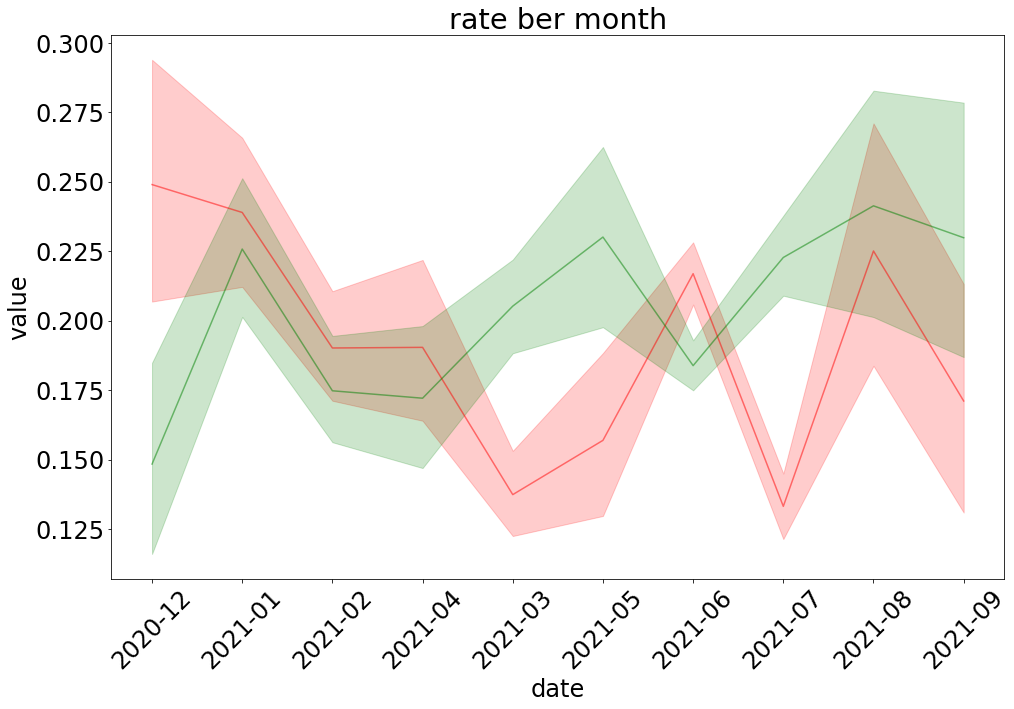

In [15]:
fig, plot = plt.subplots(figsize = (16,10))
plot = sns.lineplot(data=hdf, x="date", y="negative", color = "r", alpha = 0.5)
plot = sns.lineplot(data=hdf, x="date", y="positive", color = "g", alpha = 0.5)
plt.gca().invert_xaxis()
_ = plt.xticks(rotation=45)
plt.title('rate ber month')
_ = plt.ylabel("value")

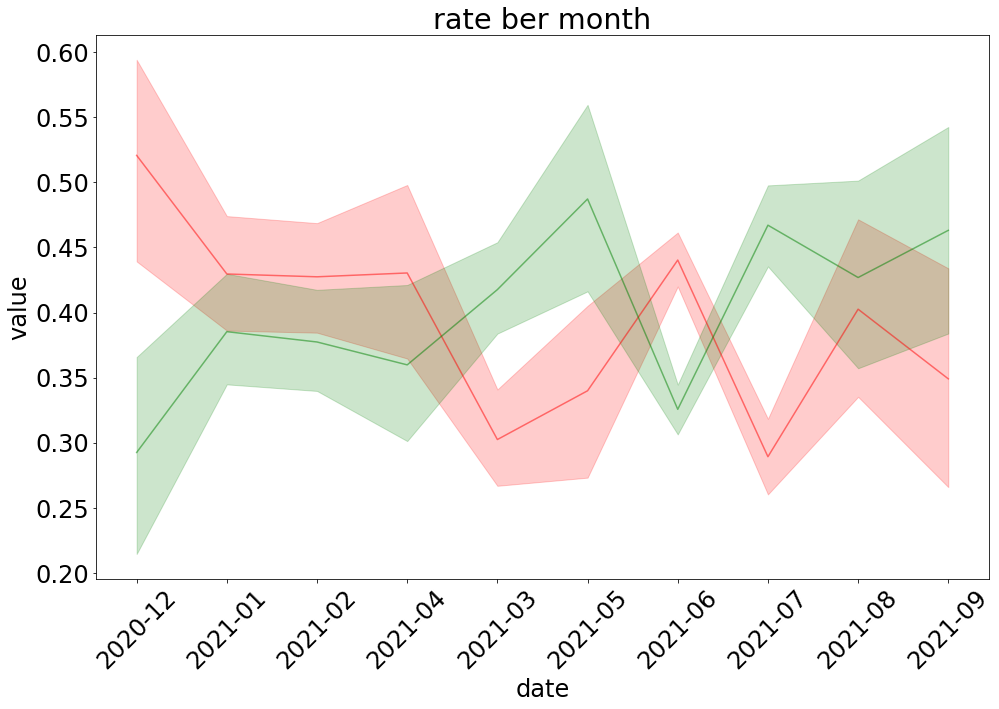

In [16]:
fig, plot = plt.subplots(figsize = (16,10))
plot = sns.lineplot(data=nudf, x="date", y="negative", color = "r", alpha = 0.5)
plot = sns.lineplot(data=nudf, x="date", y="positive", color = "g", alpha = 0.5)
plt.gca().invert_xaxis()
plt.title('rate ber month')
_ = plt.xticks(rotation=45)
_ = plt.ylabel("value")

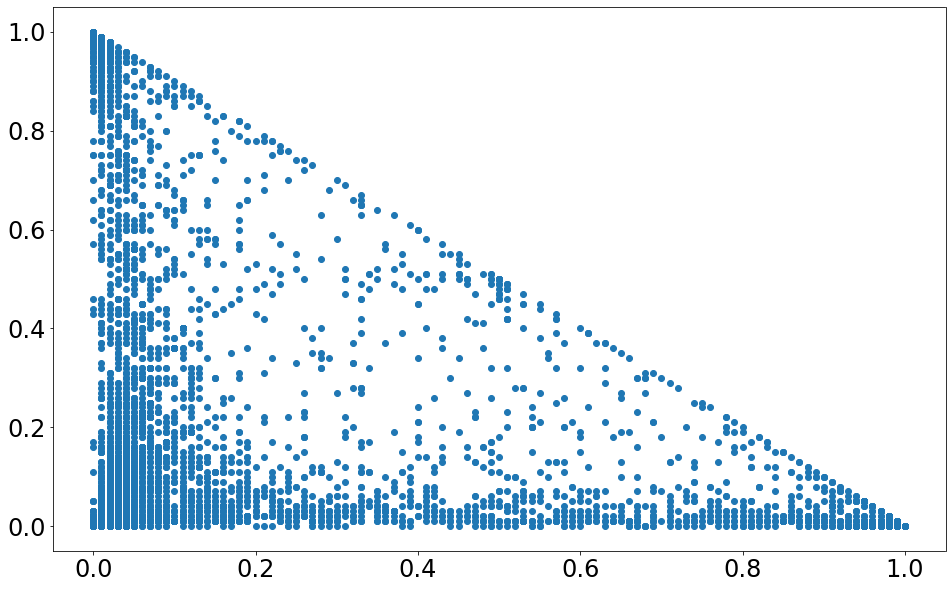

In [17]:
fig, plot = plt.subplots(figsize = (16,10))
plt.scatter(x = hdf["negative"], y =hdf["positive"] )

In [18]:
colors = sns.color_palette()

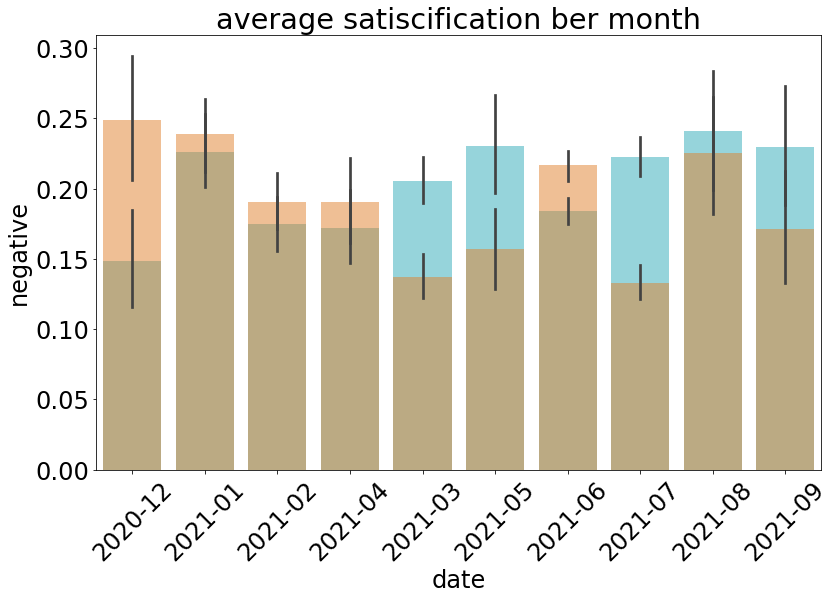

In [106]:
plot = plt.subplots(figsize = (13,8))
plot = sns.barplot(data = hdf, x ="date",  y="positive", color = colors[-1], alpha = 0.5)
plot = sns.barplot(data = hdf, x ="date",  y="negative", color = colors[1], alpha = 0.5)
plt.title('average satiscification ber month')
plt.gca().invert_xaxis()
_ = plt.xticks(rotation=45)

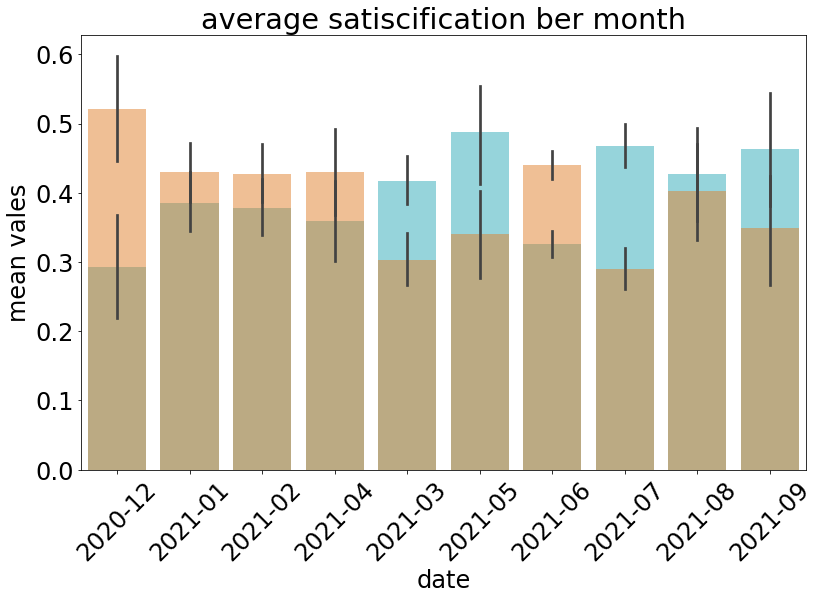

In [105]:
plot = plt.subplots(figsize = (13,8))
plot = sns.barplot(data = nudf, x ="date",  y="positive", color = colors[-1], alpha = 0.5)
plot = sns.barplot(data = nudf, x ="date",  y="negative", color = colors[1], alpha = 0.5)
plt.gca().invert_xaxis()
plt.title('average satiscification ber month')
_ = plt.ylabel("mean vales")
_ = plt.xticks(rotation=45)

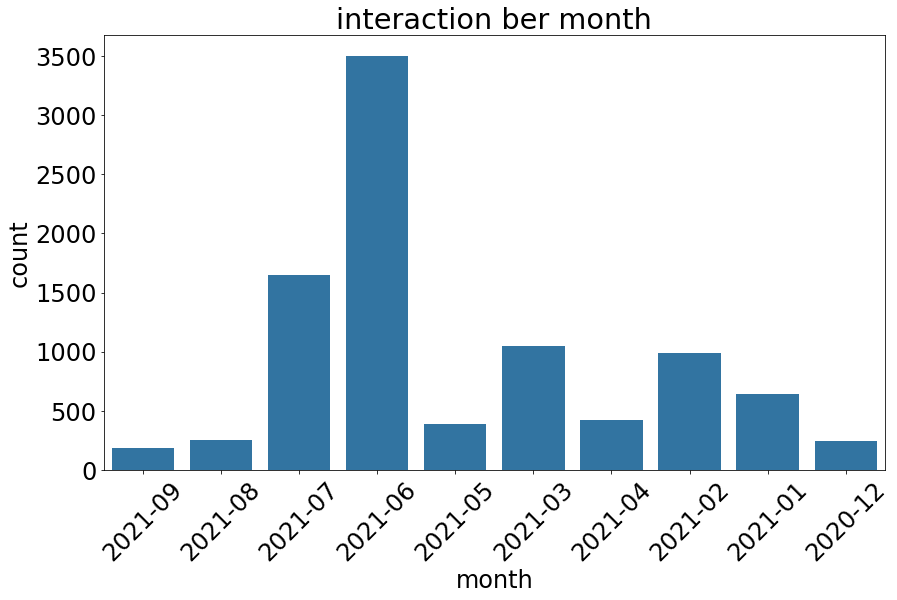

In [104]:
plot = plt.subplots(figsize = (14,8))
plot = sns.countplot(data = hdf,x = "date", color = colors[0])
_ = plt.xticks(rotation=45)
plt.title('interaction ber month')
_ = plt.ylabel("count")
_ = plt.xlabel("month")

In [22]:
df.query('sentment == "negative"').sample(10)

,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
6829,2021-06-11,اجابات اللغه الفرنسيه بها أخطاء.....,216542786968874_216583946964758,The answers of the French language have mistak...,F,negative,0.00,0.00,1.00,2021-06
11407,2021-03-10,نق=3,449644793024666_449679799687832,Nag=3,F,negative,0.03,0.20,0.77,2021-03
13791,2021-01-11,لي حضرتكوا ديما تقولوا تبعنا ومفيش اي جديد بين...,124938512795969_124984639458023,you always say ours and there is nothing new t...,F,negative,0.00,0.03,0.97,2021-01
11098,2021-03-16,الترم الثاني هتنزلوا أمته على المنصه انا معتمد...,163467848943035_163532502269903,"The second term, when will you go down to the ...",F,negative,0.00,0.00,1.00,2021-03
6430,2021-06-14,لو سمحتم تحاولوا تدوا فرص لأبنائنا في الخارج ل...,218338200122666_218384240118062,Please try to give our children opportunities ...,F,negative,0.00,0.00,1.00,2021-06
6823,2021-06-12,هي اللغه الانانيه ليه مش ظاهرالي,216542786968874_217147130241773,why is the selfish language not apparent to me,F,negative,0.00,0.00,1.00,2021-06
1201,2021-07-12,مينفعش معاكوا مراجعة تاني \nمحدش فادنا خالص,235826998373786_235828548373631,You can't have a second review,F,negative,0.00,0.01,0.99,2021-07
5581,2021-06-20,الفديوهات المراجعه مش شغاله الامتحانات بس هي ا...,219601213329698_221792776443875,reviewed videos are not only working exams why...,F,negative,0.02,0.02,0.96,2021-06
7411,2021-06-22,بس في اجابات غلط ؟؟,215541427069010_404234234166702,But there are wrong answers??,F,negative,0.00,0.00,1.00,2021-06
7507,2021-06-19,فعلا محتوي حيد بس للاسف تازل متاخر اوى المفروض...,215541427069010_199220671974483,Really it contains a neutral but unfortunately...,F,negative,0.12,0.00,0.88,2021-06


# live videos
> collect live revision videos and analyse them

In [4]:
live_df = pd.read_csv("hessas_live.csv")
live_df.head()

,created_time,message,id,from,Translate,is_human,sentment,positive,neutral,negative,post_id,genere
0,2021-08-01T16:28:09+0000,المشتقه التانيه بصفر,1967631546735549_1967659020066135,NaN,the other derivative is yellow,F,neutral,0.00,1.0,0.00,102899871666500_1967631546735549,التفاضل والتكامل
1,2021-08-01T16:01:36+0000,جزاكم الله خيرا,1967631546735549_1967633510068686,NaN,May God reward you well,F,positive,0.99,0.0,0.01,102899871666500_1967631546735549,التفاضل والتكامل
2,2021-08-01T16:27:15+0000,Sohaila Ibrahim,1967631546735549_1967657396732964,NaN,Sohaila Ibrahim,T,neutral,0.00,1.0,0.00,102899871666500_1967631546735549,التفاضل والتكامل
3,2021-08-01T16:04:01+0000,Ali Hitham Zsc,1967631546735549_1967635983401772,NaN,Ali Hitham Zsc,T,neutral,0.00,1.0,0.00,102899871666500_1967631546735549,التفاضل والتكامل
4,2021-08-01T16:22:39+0000,Ahmed Hegazy احمد محمود عبد البديع Ÿazaň Aýmaň,1967631546735549_1967653003400070,NaN,Ahmed Hegazy احمد محمود عبد البديع Ÿazaň Aýmaň,T,neutral,0.00,1.0,0.00,102899871666500_1967631546735549,التفاضل والتكامل


#### Fix data
> setup time data <br>select non mention data<br>

In [79]:
## setup time
live_df.created_time =  live_df["created_time"].str.slice(0, 10)
live_df["date"] = live_df["created_time"].str.slice(0, 7)
live_df.created_time

0        2021-08-01
1        2021-08-01
2        2021-08-01
3        2021-08-01
4        2021-08-01
            ...    
40618    2020-12-30
40619    2020-12-30
40620    2020-12-30
40621    2020-12-30
40622    2020-12-30
Name: created_time, Length: 40623, dtype: object

In [80]:
live_df = live_df.query('is_human != "T"')

#### explore data

In [81]:
live_df.query('genere == "للغة العربية"').sample(20)

,created_time,message,id,from,Translate,is_human,sentment,positive,neutral,negative,post_id,genere,date
13086,2021-07-08,علي الله حكايتك يا دفعه,339098197702579_207769647791460,NaN,God bless your story Pusha,F,positive,0.96,0.03,0.01,102899871666500_339098197702579,للغة العربية,2021-07
39642,2020-12-30,ليه مافيش شرح لغه عربيه لاولى ثانوى على المنصه,155841509303552_415296206337998,NaN,Why is there no Arabic explanation for the fir...,F,negative,0.01,0.30,0.69,102899871666500_155841509303552,للغة العربية,2020-12
13669,2021-07-08,هيئة,339098197702579_1247745965689387,NaN,Body,F,neutral,0.08,0.88,0.04,102899871666500_339098197702579,للغة العربية,2021-07
16317,2021-07-08,Walaa Adel هيطول ده ولا اي 😂😂😂😂,339098197702579_1346477709086015,NaN,walaa adel will last this long or any 😂😂😂😂,F,neutral,0.01,0.98,0.01,102899871666500_339098197702579,للغة العربية,2021-07
14879,2021-07-08,مبتدأ ثانٍ-توكيد معنوي,339098197702579_496112378150754,NaN,Second starter - moral emphasis,F,neutral,0.01,0.96,0.03,102899871666500_339098197702579,للغة العربية,2021-07
15285,2021-07-08,هو ده الامتحان؟,339098197702579_4418683294843733,NaN,Is this the exam?,F,positive,0.91,0.06,0.03,102899871666500_339098197702579,للغة العربية,2021-07
15348,2021-07-08,بدل,339098197702579_1346487319085054,NaN,change,F,neutral,0.11,0.83,0.06,102899871666500_339098197702579,للغة العربية,2021-07
13668,2021-07-08,ولا ده ولا ده ولا ده\n,339098197702579_1086774098518315,NaN,It's a country that's deh wala,F,neutral,0.07,0.91,0.02,102899871666500_339098197702579,للغة العربية,2021-07
12831,2021-07-08,طب متجيب حاجات تحل عليها احسن طاااب,339098197702579_4086617174747255,NaN,ok don't bring things to solve better,F,negative,0.37,0.03,0.60,102899871666500_339098197702579,للغة العربية,2021-07
39798,2021-01-03,ب الاجابه,155841509303552_3561136047333453,NaN,with the answer,F,neutral,0.01,0.99,0.00,102899871666500_155841509303552,للغة العربية,2021-01


In [5]:
live_df["message"][13467]

'مجزوم بلام الأمر لأنه مش فاء سببيه مش مسبوقة بنفي أو طلب '

In [6]:
live_df["Translate"][13467]

'It is necessary to blame the matter because it is not a causality that is not preceded by denial or request '

In [26]:
data_lis = live_df.genere.value_counts()
data_lis

للغة العربية               15735
اللغة الإنجليزية            6736
التاريخ                     2834
الفلسفة                     2656
علم النفس                   1604
الجغرافيا                   1602
الكيمياء                    1301
الإسبانية                   1297
للغة الفرنسية               1267
الجيولوجيا                  1056
الفيزياء                     912
الألمانية                    807
الأحياء                      665
الإيطالية                    624
الجبر والهندسة الفراغية      403
لدراسات الاجتماعية           329
الرياضيات                    242
الهندسة                      195
العلوم                       128
الديناميكا                   104
التفاضل والتكامل              71
الاستاتيكا                    55
Name: genere, dtype: int64

In [27]:
## fix arabic words
for i in range(len(data_lis)):
    data_lis.rename(index = {list(data_lis.index)[i] : get_display(arabic_reshaper.reshape(list(data_lis.index)[i]))},  inplace = True)

In [28]:
data_lis

ﺔﻴﺑﺮﻌﻟﺍ ﺔﻐﻠﻟ               15735
ﺔﻳﺰﻴﻠﺠﻧﻹﺍ ﺔﻐﻠﻟﺍ             6736
ﺦﻳﺭﺎﺘﻟﺍ                     2834
ﺔﻔﺴﻠﻔﻟﺍ                     2656
ﺲﻔﻨﻟﺍ ﻢﻠﻋ                   1604
ﺎﻴﻓﺍﺮﻐﺠﻟﺍ                   1602
ﺀﺎﻴﻤﻴﻜﻟﺍ                    1301
ﺔﻴﻧﺎﺒﺳﻹﺍ                    1297
ﺔﻴﺴﻧﺮﻔﻟﺍ ﺔﻐﻠﻟ               1267
ﺎﻴﺟﻮﻟﻮﻴﺠﻟﺍ                  1056
ﺀﺎﻳﺰﻴﻔﻟﺍ                     912
ﺔﻴﻧﺎﻤﻟﻷﺍ                     807
ﺀﺎﻴﺣﻷﺍ                       665
ﺔﻴﻟﺎﻄﻳﻹﺍ                     624
ﺔﻴﻏﺍﺮﻔﻟﺍ ﺔﺳﺪﻨﻬﻟﺍﻭ ﺮﺒﺠﻟﺍ      403
ﺔﻴﻋﺎﻤﺘﺟﻻﺍ ﺕﺎﺳﺍﺭﺪﻟ            329
ﺕﺎﻴﺿﺎﻳﺮﻟﺍ                    242
ﺔﺳﺪﻨﻬﻟﺍ                      195
ﻡﻮﻠﻌﻟﺍ                       128
ﺎﻜﻴﻣﺎﻨﻳﺪﻟﺍ                   104
ﻞﻣﺎﻜﺘﻟﺍﻭ ﻞﺿﺎﻔﺘﻟﺍ              71
ﺎﻜﻴﺗﺎﺘﺳﻻﺍ                     55
Name: genere, dtype: int64

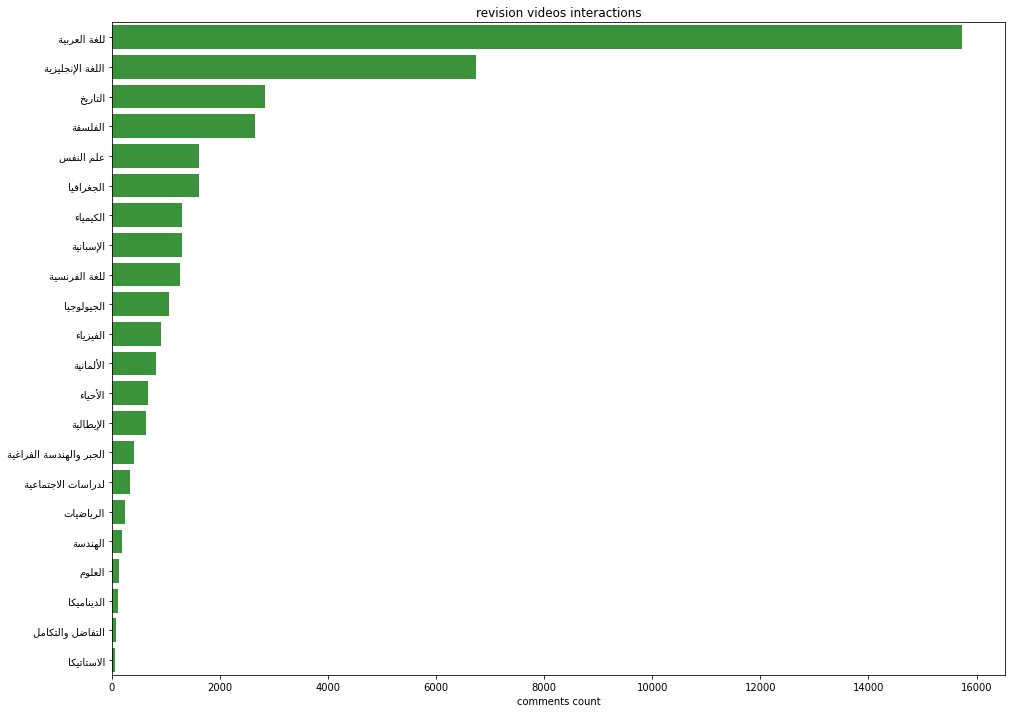

In [29]:
plot = plt.subplots(figsize = (16,12))
sns.barplot(y = data_lis.index, x = data_lis.values, color = colors[2])

plt.title('revision videos interactions')
_ = plt.xlabel("comments count")

### create wordcloud 
> select subjects values<br> create text with words counr<br> reshape arabic words<br>draw wordcloud

In [67]:
data_lis =live_df.genere.value_counts()

In [74]:
## collect data
word_list = []
for i in range(len(data_lis)):
     for j in range(data_lis.values[i]):
        word_list.append(data_lis.index[i].replace(" ", ""))

In [75]:
## join text
text = " ".join(word_list)

In [76]:
## define reshape function

def reshape_arabic(text_file):
    te = arabic_reshaper.reshape(text_file)
    te = get_display(te)
    
      
    word_replace = {"ﺀ":"ء", "ﺍ":"ا", "ﺏ":"ب", "ﺕ":"ت", "ﺓ":"ة", "ﺙ":"ث", "ﺝ":"ج",
                    "ﺡ":"ح", "خ":"ﺥ", "ﺩ":"د", "ﺫ":"ذ", "ﺭ":"ر", "ﺯ":"ز", "ﺱ":"س", 
                    "ﺵ":"ش", "ﺹ":"ص", "ﺽ":"ض", "ﻁ":"ط", "ﻅ":"ظ", "ﻉ":"ع", "ﻍ":"غ",
                    "ﻑ":"ف", "ﻕ":"ق", "ﻙ":"ك", "ﻝ":"ل", "ﻡ":"م", "ﻥ":"ن", "ﻩ":"ه",
                    "ﻭ":"و", "ﻱ":"ى", "ﻯ":"ي" ,}                   
    for i in word_replace.keys():
        te = te.replace(i, word_replace[i])
        
    return te

In [77]:
## reshape text
text = reshape_arabic(text)

### generate wordcloud 

In [80]:
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                stopwords = set(STOPWORDS),
                font_path='Tajawal-Regular.ttf',
                min_font_size = 11,
                collocations=False).generate(text)

### plot trext

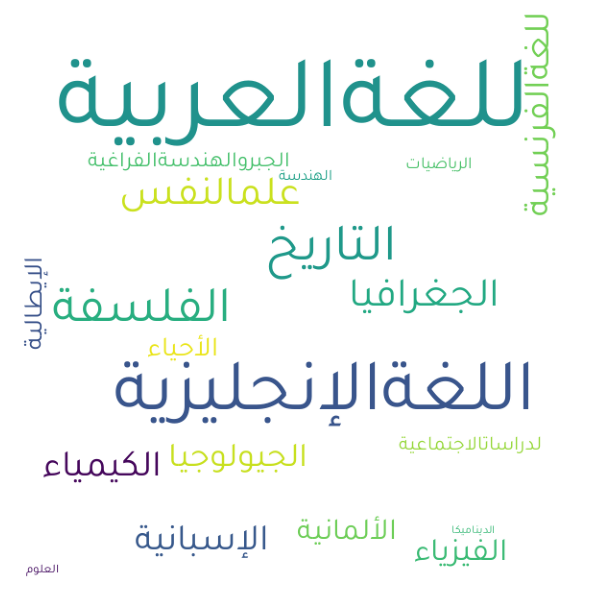

In [81]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show() 
